<a href="https://colab.research.google.com/github/douglascdev/imersao_dados_alura/blob/main/aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://www.alura.com.br/assets/img/imersoes/imersao-dados-3ed/logo-imersao-dados.1618604914.svg" alt="drawing" width=50% height=auto  style="background-color:red;padding:20px;" /> 
</center>

## Importação dos dados

In [1]:
import pandas as pd
dados = pd.read_csv("https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true", compression="zip")

Renomendo a coluna ```droga``` para ```composto```:

In [2]:
dados.rename(columns={"droga": "composto"}, inplace=True)

Importando a biblioteca ```seaborn``` para criar os gráficos abaixo.

In [3]:
import seaborn as sns

Aplica o layout padrão do ```seaborn``` no notebook:

In [4]:
sns.set()

Adiciona algumas alterações de estilo aos gráficos da biblioteca:

In [5]:
CINZA_COLAB = "#383838"
BRANCO = "w"
TAM_FONTE = 14
sns.set(rc={
    'figure.facecolor': CINZA_COLAB, 
    'axes.facecolor': CINZA_COLAB, 
    "axes.labelcolor": BRANCO, 
    "axes.titlecolor": BRANCO,
    "axes.labelsize": TAM_FONTE,
    "axes.titlesize": TAM_FONTE,
    "xtick.labelsize" : TAM_FONTE,
    "ytick.labelsize" : TAM_FONTE,
    "xtick.color": BRANCO,
    "ytick.color": BRANCO,

})

Importa o ```pyplot``` do ```matplotlib```:

In [6]:
import matplotlib.pyplot as plt 

## Ordenar e melhorar a visualização do gráfico countplot

Obter o código dos 5 compostos mais utilizados

In [7]:
cod_compostos = dados["composto"].value_counts().index[0:5]

Buscar nos dados as linhas em que o composto utilizado é um dos 5 códigos acima

In [8]:
linhas_compostos_mais_usados = dados.query("composto in @cod_compostos")

Cria um countplot ordenado e estilizado com os dados:

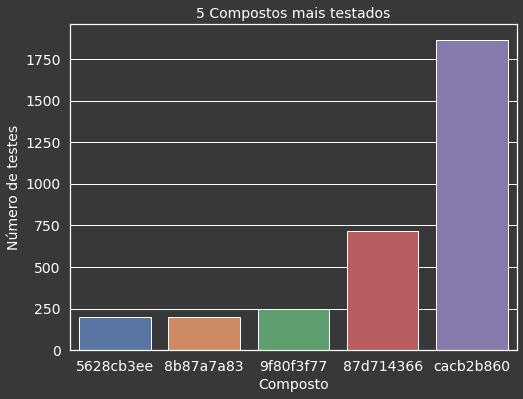

In [9]:
plt.figure(figsize=(8,6))
grafico = sns.countplot(
    data=linhas_compostos_mais_usados, 
    x="composto", 
    order=reversed(cod_compostos),
)
grafico.set(
    xlabel="Composto", 
    ylabel="Número de testes", 
    title="5 Compostos mais testados",
)
plt.show()

## Histogramas e análise das colunas "g-"

Para ter uma idéia de como estão os dados nessas colunas, vamos ver quantos valores únicos estão na coluna ```g-0```:

In [10]:
res = f"""Linhas únicas: {len(dados["g-0"].unique())}
Total de linhas: {len(dados["g-0"])}"""
print(res)

Linhas únicas: 14367
Total de linhas: 23814


São 14.367 valores diferentes na coluna de um total de 23.814, mostrando que a coluna possui um tipo de dado contínuo.

Agora vamos utilizar a função ```describe``` para obter um resumo dos dados estatísticos da coluna, como média e mediana: 

In [11]:
dados["g-0"].describe()

count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g-0, dtype: float64

Agora vamos criar um histograma  a partir dos dados da coluna, para visualizar a distribuição dos valores:

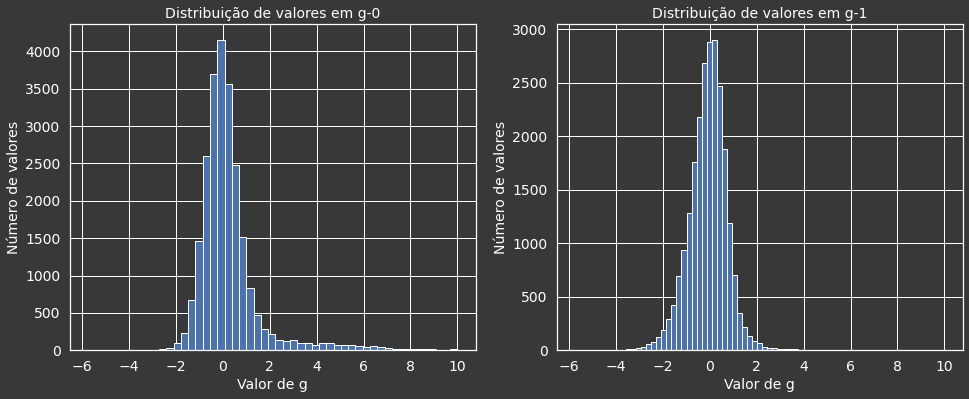

In [12]:
QTD_GRAFICOS = 2
fig, axes = plt.subplots(1, QTD_GRAFICOS, sharex=True, figsize=(QTD_GRAFICOS*8,6))
for i in range(QTD_GRAFICOS):
  grafico = dados[f"g-{i}"].hist(bins=50, ax=axes[i]) 
  grafico.set(
      xlabel="Valor de g", 
      ylabel="Número de valores", 
      title=f"Distribuição de valores em g-{i}",
  )
plt.show()

A maior distribuição está ao redor de 0 nas duas primeiras colunas.

Para ter uma noção geral da distribuição das colunas ```g-```, vamos utilizar o ```describe``` para gerar as estatísticas de média, mediana, etc de todas as colunas e plotar esses dados em um histograma.

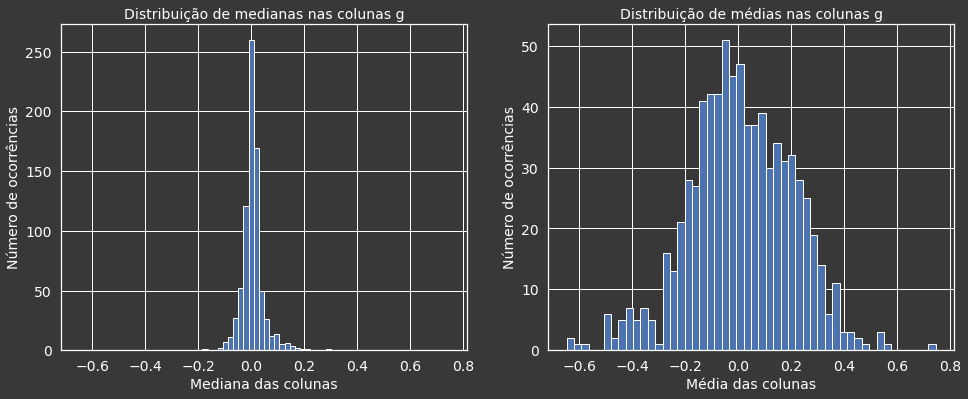

In [13]:
colunas_g = [coluna for coluna in dados.columns if coluna.startswith("g-")]
g_transposto = dados.loc[:, colunas_g].describe().transpose()
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,6))
grafico = g_transposto["50%"].hist(bins=25, ax=axes[0])
grafico.set(
    xlabel="Mediana das colunas", 
    ylabel="Número de ocorrências", 
    title="Distribuição de medianas nas colunas g",
)
grafico2 = g_transposto["mean"].hist(bins=50, ax=axes[1])
grafico2.set(
    xlabel="Média das colunas", 
    ylabel="Número de ocorrências", 
    title="Distribuição de médias nas colunas g",
)
plt.show()

As distribuições de média e mediana dos valores das colunas ```g-``` ocorrem nos valores próximos de 0. Agora vamos analisar a distribuição dos ```outliers``` das colunas, plotando os valores máximos e mínimos retornados pelo ```describe```.



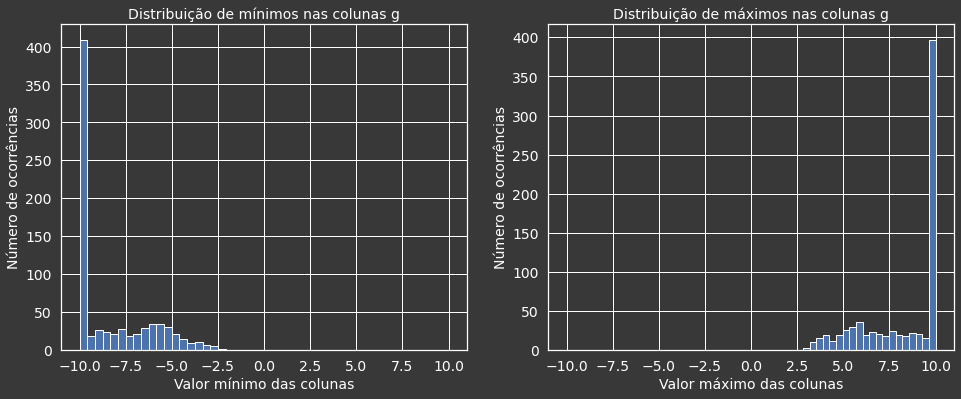

In [14]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,6))
grafico = g_transposto["min"].hist(bins=20, ax=axes[0])
grafico.set(
    xlabel="Valor mínimo das colunas", 
    ylabel="Número de ocorrências", 
    title="Distribuição de mínimos nas colunas g",
)
grafico2 = g_transposto["max"].hist(bins=20, ax=axes[1])
grafico2.set(
    xlabel="Valor máximo das colunas", 
    ylabel="Número de ocorrências", 
    title="Distribuição de máximos nas colunas g",
)
plt.show()

A maior concentração de valores mínimos está no valor -10, enquanto a concentração de maiores valores está em 10. A distribuição nesses valores específicos pode ser devido a normalização dos dados. 

## Estudar sobre as estatísticas retornadas no .describe()

A função ```describe``` gera estatísticas que resumem a tendência central, dispersão e distribuição dos dados. Retorna os seguintes valores:

* ```count```: A contagem dos valores não nulos.
* ```max```: Maior valor presente nos dados.
* ```min```: Menor valor presente nos dados.
* ```mean```: Média dos valores presentes nos dados.
* ```std```: Desvio padrão dos valores presentes nos dados, indicando sua dispersão.
* ```25%```: Mediana da primeira metade dos dados.
* ```50%```: Mediana dos dados.
* ```75%```: Mediana da segunda metade dos dados.

## Refletir sobre a manipulação do tamanho das visualizações


 O tamanho das visualizações é essencial para que os dados sejam visualizados de maneira inteligível, assim como a escolha do tipo correto de gráfico, label dos dados, tamanho da fonte, etc. 


 Todas essas escolhas podem afetar como que os dados serão interpretados e portanto a conclusão obtida a partir deles.  

## Fazer outras análises com o boxplot e até com o histograma

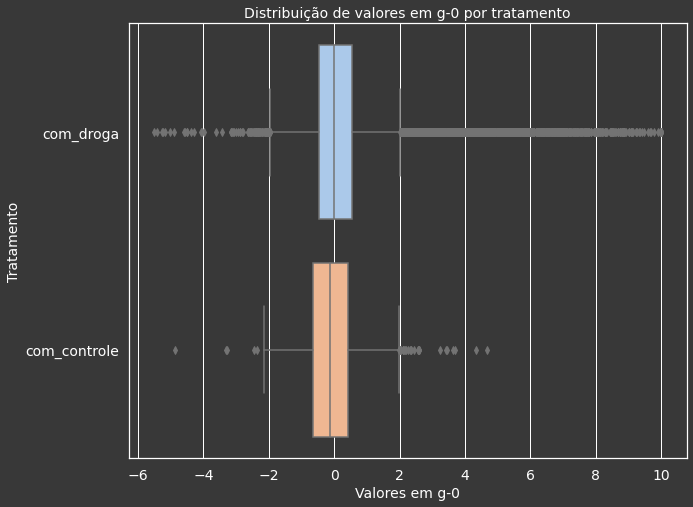

In [15]:
plt.figure(figsize=(10, 8))
bp = sns.boxplot(x="g-0", y="tratamento", data=dados, palette="pastel")
bp.set(
    xlabel="Valores em g-0", 
    ylabel="Tratamento", 
    title="Distribuição de valores em g-0 por tratamento"
)
plt.show()

O ```boxplot``` permite visualizar a distribuição dos dados mais facilmente. Na linha com a caixa é definida a mediana dos dados, onde está a maior parte dos dados. Na linha a esquerda a mediana da primeira metade, e na linha a direita a mediana da segunda metade.

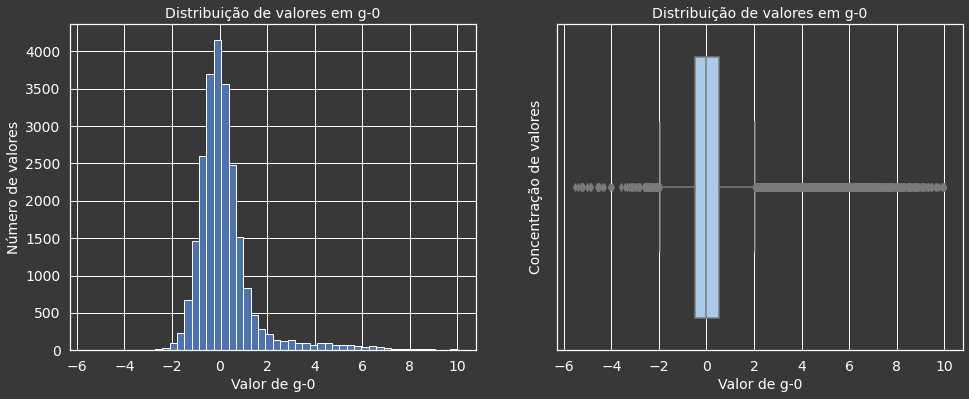

In [18]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,6))
hg = dados["g-0"].hist(bins=50, ax=axes[0])
hg.set(
    xlabel="Valor de g-0", 
    ylabel="Número de valores", 
    title="Distribuição de valores em g-0",
)
bp = sns.boxplot(x="g-0", data=dados, palette="pastel", ax=axes[1])
bp.set(
    xlabel="Valor de g-0", 
    ylabel="Concentração de valores", 
    title="Distribuição de valores em g-0"
)
plt.show()

Tanto o histograma quanto o ```boxplot``` acima indicam a distribuição dos dados em ```g-0```.

## Resumo do que você aprendeu com os dados

* A coluna ```g-0``` possui 14.367 valores diferentes na coluna de um total de 23.814, então as colunas ```g-``` possuem um tipo de dado contínuo.
A distribuição de valores de ```g-0``` e ```g-0``` está concentrada ao redor de 0.
* Foi obtido um resumo estatístico das colunas ```g-``` através da função ```describe```.
* As distribuições de média e mediana dos valores das colunas ```g-``` também ocorrem nos valores próximos de 0.
* A maior concentração de valores mínimos está no valor -10, enquanto a concentração de maiores valores está em 10.
* O ```boxplot``` permitiu visualizar a distribuição dos dados mais facilmente.
.
